#### Michael Paris
#### SCLM 550
#### Milestone 1

#### Predicting Late Transportation Loads
##### Introduction
This is a dataset that I used in an earlier class where the data was analyzed for correlations.  For this project, I want to use the data to train models to predict if a transportation load would be delivered late.
##### Background
Walmart’s Transportation Division is responsible for moving freight from vendors to distribution centers (DCs) and from DCs to stores and clubs.  Delivering freight on time and in full as efficiently as possible is one of the most important goals for the Walmart Transportation division.  On-time delivery reduces out of stocks, helps reduce lost sales, and reduces wages in the form of idled unloading teams.  This project will attempt to build models that can predict when a load will be delivered late based on the data that is available when the load is built in our system.  If this model is successful at predicting late loads, then special attention could be given to those loads to ensure they are delivered on time.  Analysis of the model and what it is ‘keying’ in on could be conducted and those root issues could be corrected.  An example of this could be correcting an issue with an incorrect transit time being applied to a given lane.
##### About the Data
This dataset shows inbound and outbound loads, loads coming into a distribution center from a vendor or leaving a distribution center for a store or club.  The dataset contains 99,999 rows and 162 columns of information.  There will be quite a bit of clean-up needed before the model can be trained and tested, we’ll do some of it initially, then more as we move towards setting up the model and training.


#### Milestone 2 begins below.

In [1]:
# 01/31/2022 add additional commenting of my code

In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [3]:
##import the load data
## low memory = false because this is a pretty large dataset

load_df = pd.read_csv('TransportationLoads.csv', low_memory=False)

In [4]:
# lets look at the data

print(load_df.shape)
load_df.head()

(99999, 162)


,load_id,orign_loc_cd,orign_loc_id,orign_loc_type_cd,orign_loc_type_desc,orign_zone_cd,orign_zone_desc,orign_loc_nm,orign_st_addr_line_1,orign_city_nm,...,load_last_event_cd,load_last_event_desc,load_last_event_sys_gen_ind,manl_load_late_event_cd,manl_load_late_event_desc,src_rcv_ts,load_userid,load_ts,upd_ts,upd_userid
0,10001386,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,NaN,H. P. HOOD FOODS,NaN,WINCHESTER,...,D1,D1-Completed Unloading at Delivery Location-No...,0.0,NaN,NaN,49:42.0,svcscdl,12:05.0,55:07.0,svcscdl
1,10001617,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,NaN,H. P. HOOD FOODS,NaN,WINCHESTER,...,D1,D1-Completed Unloading at Delivery Location-No...,0.0,NaN,NaN,49:42.0,svcscdl,12:04.0,55:07.0,svcscdl
2,10001644,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,NaN,H. P. HOOD FOODS,NaN,WINCHESTER,...,AFSYSGEN,AF Sys Gen Auto Populate,0.0,NaN,NaN,49:42.0,svcscdl,12:06.0,55:07.0,svcscdl
3,10001762,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,NaN,H. P. HOOD FOODS,NaN,WINCHESTER,...,D1,D1-Completed Unloading at Delivery Location-No...,0.0,NaN,NaN,49:42.0,svcscdl,12:06.0,55:07.0,svcscdl
4,10002440,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,NaN,H. P. HOOD FOODS,NaN,WINCHESTER,...,CMPD,Completed,1.0,NaN,NaN,49:42.0,svcscdl,12:05.0,55:07.0,svcscdl


In [5]:
my_list = load_df.columns.values.tolist()
my_list

['load_id',
 'orign_loc_cd',
 'orign_loc_id',
 'orign_loc_type_cd',
 'orign_loc_type_desc',
 'orign_zone_cd',
 'orign_zone_desc',
 'orign_loc_nm',
 'orign_st_addr_line_1',
 'orign_city_nm',
 'orign_st_prov_cd',
 'orign_postal_cd',
 'orign_cntry_cd',
 'orign_lat_dgr',
 'orign_long_dgr',
 'dest_loc_cd',
 'dest_loc_id',
 'dest_loc_type_cd',
 'dest_loc_type_desc',
 'dest_zone_cd',
 'dest_zone_desc',
 'dest_loc_nm',
 'dest_st_addr_line_1',
 'dest_city_nm',
 'dest_st_prov_cd',
 'dest_postal_cd',
 'dest_cntry_cd',
 'dest_lat_dgr',
 'dest_long_dgr',
 'non_live_pckup_ind',
 'non_live_dlvr_ind',
 'svc_rate_cd',
 'svc_rate_desc',
 'trnsp_mode_cd',
 'trnsp_mode_desc',
 'equip_type_cd',
 'equip_type_desc',
 'spot_rate_ind',
 'trlr_id',
 'src_create_user_id',
 'src_create_ts',
 'src_last_chng_user_id',
 'src_last_chng_ts',
 'max_shpmnt_qty',
 'load_stop_qty',
 'load_plan_type_id',
 'optimizer_batch_id',
 'load_conf_user_id',
 'scac_cd',
 'op_cmpny_cd',
 'op_load_status_id',
 'op_load_status_cd',
 'o

In [6]:
# lots of repeated code here, put this in a function if you can't find a way to delete more than one column at a time
# 01/31/2022 updated this to get a df of columns that have more that 50k nulls and 
# use .drop instead of calling del for each column.  MUCH CLEANER!

null_value_columns = load_df[load_df.columns[load_df.isnull().sum() > 50000]]
load_df.drop(columns=null_value_columns, axis=1, inplace=True)


#del load_df['orign_zone_desc']
#del load_df['orign_st_addr_line_1']
#del load_df['orign_lat_dgr']
#del load_df['orign_long_dgr']
#del load_df['dest_zone_desc']
#del load_df['dest_st_addr_line_1']
#del load_df['dest_lat_dgr']
#del load_df['dest_long_dgr']
#del load_df['trlr_id']
#del load_df['load_plan_type_id']
#del load_df['addtnl_chrg_amt']
#del load_df['load_sched_ovrd_ind']
#del load_df['rate_shop_rsn_cd']
#del load_df['rate_shop_rsn_desc']
#del load_df['last_vouch_cre_excpt_id']
#del load_df['last_vouch_cre_excpt_cd']
#del load_df['last_vouch_cre_excpt_desc']
#del load_df['last_vouch_cre_excpt_ts']
#del load_df['last_load_shpmnt_chng_ts']
#del load_df['last_load_sched_optimizer_ts']
#del load_df['mdse_seg_nbr']
#del load_df['manl_load_late_event_cd']
#del load_df['manl_load_late_event_desc']

In [7]:
load_df.shape

(99999, 139)

In [8]:
#check the datatypes
print(load_df.dtypes.carr_dlvr_due_dt)
print(load_df.dtypes.orign_loc_id)
print(load_df.dtypes.dest_loc_id)
print(load_df.dtypes.carrier_nm)
print(load_df.dtypes.equip_type_desc)
print(load_df.dtypes.est_tot_mi_qty)
print(load_df.dtypes.lnhul_chrg_amt)
print(load_df.dtypes.carr_pckup_due_dt)

##'sc_load.act_load_cmpl_ts'] > 'sc_load.carr_dlvr_due_dt']

object
int64
int64
object
object
int64
float64
object


In [9]:
# origin location id isints, but aren't meant for applying math to them
# origin_loc_id and dest_loc_id represent the unique number of the origin or destinations of the load, 
# it's not meant to apply math to it.
# change it over to a string

load_df.orign_loc_id = load_df.orign_loc_id.astype(str)
load_df.dest_loc_id = load_df.dest_loc_id.astype(str)
load_df.est_tot_mi_qty = load_df.est_tot_mi_qty.astype(int)

In [10]:
## take the time off of the load_complete timestamp as the actual load comlete ts doesn't contain the timestamp

load_df.act_load_cmpl_ts = pd.to_datetime(load_df['act_load_cmpl_ts']).dt.date
load_df.carr_pckup_due_dt = pd.to_datetime(load_df['carr_pckup_due_dt']).dt.date

In [11]:
## check to make sure the timestamps are taken off

load_df[['load_id', 'act_load_cmpl_ts', 'carr_dlvr_due_dt', 'carr_pckup_due_dt']]

,load_id,act_load_cmpl_ts,carr_dlvr_due_dt,carr_pckup_due_dt
0,10001386,2019-04-28,4/28/2019,2019-04-28
1,10001617,2019-05-01,4/29/2019,2019-04-29
2,10001644,2019-04-30,4/30/2019,2019-04-30
3,10001762,2019-05-02,4/30/2019,2019-04-30
4,10002440,2019-05-04,5/4/2019,2019-05-04
...,...,...,...,...
99994,11118791,NaT,9/24/2020,2020-09-24
99995,11118813,2020-10-09,9/24/2020,2020-09-24
99996,11118817,2020-10-09,9/24/2020,2020-09-24
99997,11118903,2020-09-25,9/24/2020,2020-09-24


In [12]:
##make sure these date columns are date type

load_df.carr_dlvr_due_dt= pd.to_datetime(load_df.carr_dlvr_due_dt)
load_df.act_load_cmpl_ts= pd.to_datetime(load_df.act_load_cmpl_ts)
load_df.carr_pckup_due_dt= pd.to_datetime(load_df.carr_pckup_due_dt)

In [13]:
print(load_df.dtypes['carr_dlvr_due_dt'])
print(load_df.dtypes['act_load_cmpl_ts'])
print(load_df.dtypes['carr_pckup_due_dt'])

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [14]:
# compare the actual load complete date to the delivery due date to determine late loads.  
# a value of 1 represents a late load and 0 represents an on-time load
# added one to the due date as Walmart allows a small range for delivery

comparison_column = np.where(load_df['act_load_cmpl_ts'] > load_df['carr_dlvr_due_dt'] + pd.DateOffset(1), 1, 0)
load_df['Late_Load'] = comparison_column
load_df[['load_id','act_load_cmpl_ts', 'carr_dlvr_due_dt', 'Late_Load']]

,load_id,act_load_cmpl_ts,carr_dlvr_due_dt,Late_Load
0,10001386,2019-04-28,2019-04-28,0
1,10001617,2019-05-01,2019-04-29,1
2,10001644,2019-04-30,2019-04-30,0
3,10001762,2019-05-02,2019-04-30,1
4,10002440,2019-05-04,2019-05-04,0
...,...,...,...,...
99994,11118791,NaT,2020-09-24,0
99995,11118813,2020-10-09,2020-09-24,1
99996,11118817,2020-10-09,2020-09-24,1
99997,11118903,2020-09-25,2020-09-24,0


In [15]:
# 01/31/2022 lets create a column to hold the number of days a load is late

load_df['delivery_days_dif'] = (load_df['act_load_cmpl_ts'] - load_df['carr_dlvr_due_dt']).dt.days
load_df['delivery_days_dif']

0         0.0
1         2.0
2         0.0
3         2.0
4         0.0
         ... 
99994     NaN
99995    15.0
99996    15.0
99997     1.0
99998     4.0
Name: delivery_days_dif, Length: 99999, dtype: float64

In [16]:
load_df.shape

(99999, 141)

In [17]:
# 01/31/2022 review this and see why I'm going this.

late_load = load_df[load_df.Late_Load == 1]
#late_load.head()
late_load.shape

(36641, 141)

In [18]:
load_df.shape

(99999, 141)

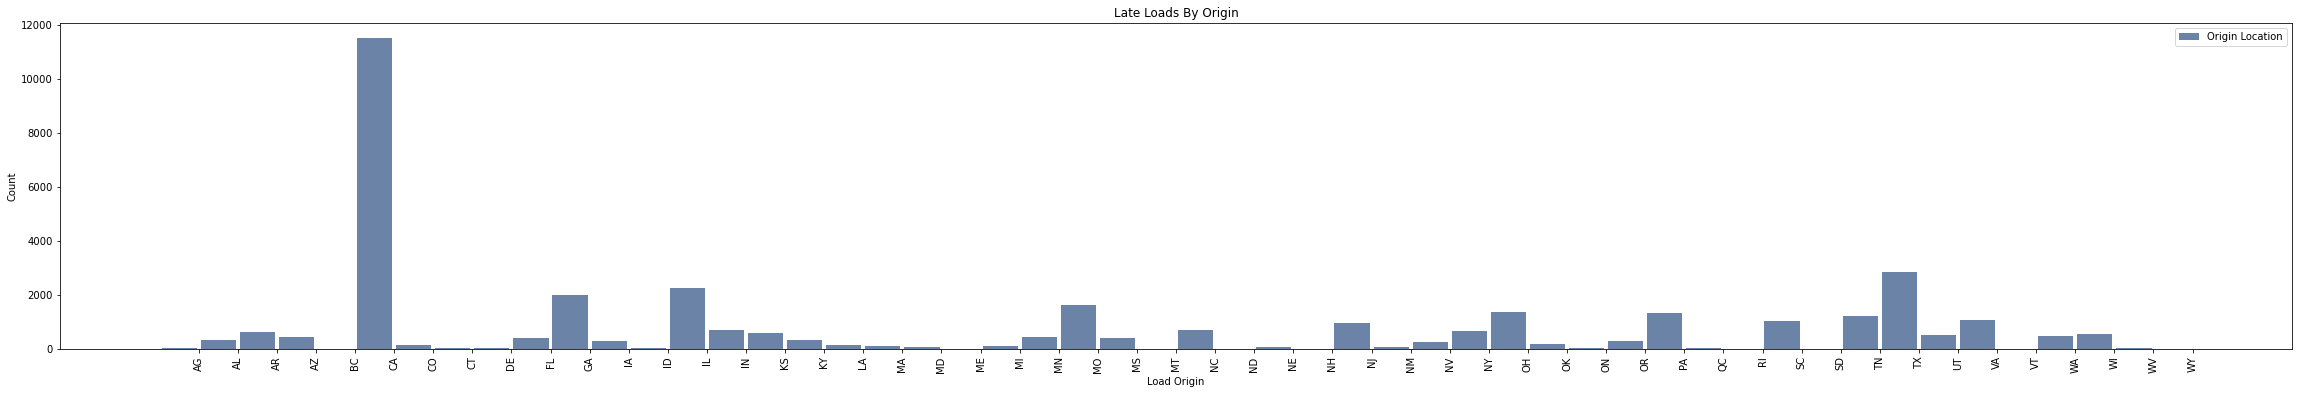

<Figure size 576x432 with 0 Axes>

In [19]:
hist = thinkstats2.Hist(late_load['orign_st_prov_cd'], label='Origin Location')
thinkplot.figure(figsize=(40,6))
plt.xticks(rotation=90)
thinkplot.Hist(hist)
thinkplot.Show(title='Late Loads By Origin', xlabel='Load Origin', ylabel='Count')
#below code saves the plot to a file
#thinkplot.save(root='dest_hist', bbox_inches = 'tight')

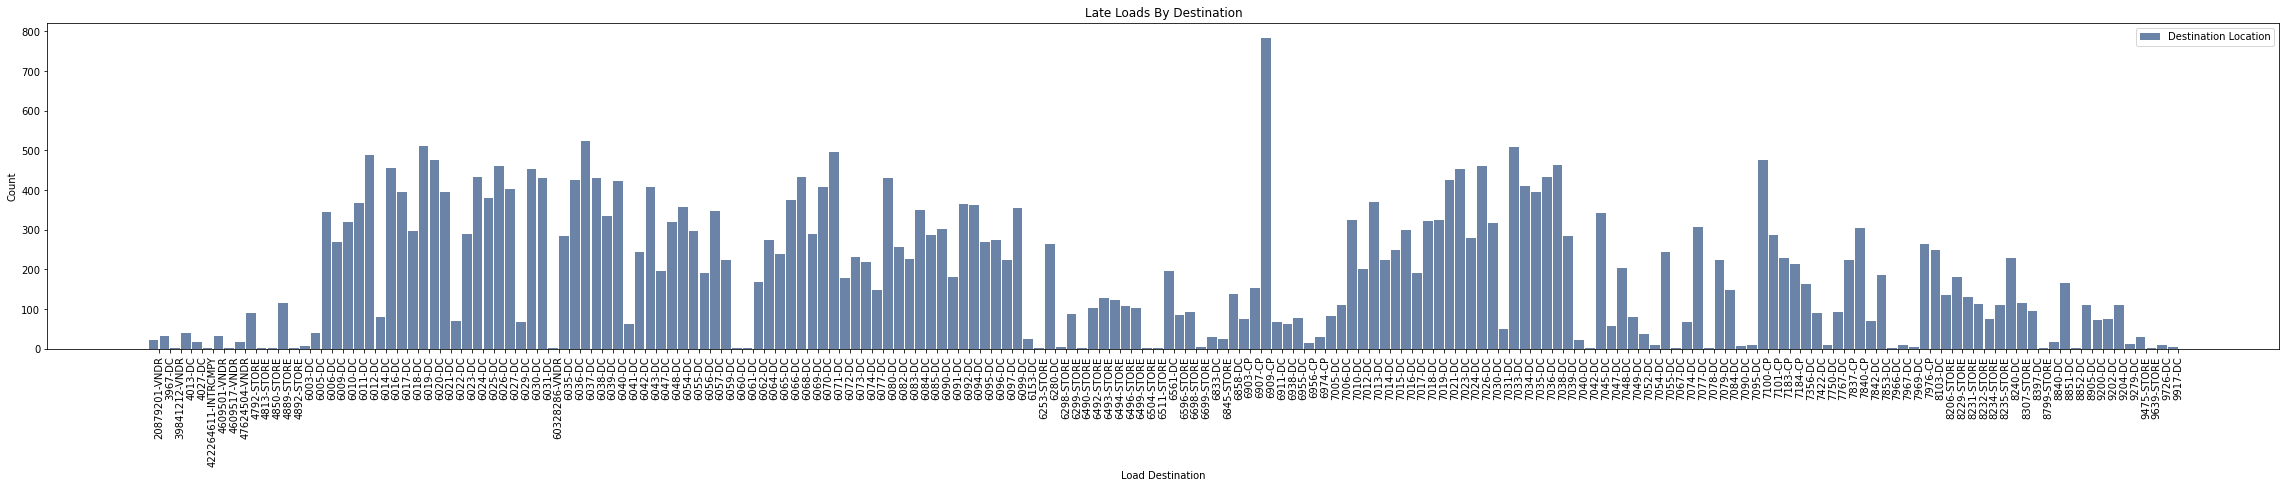

No handles with labels found to put in legend.


Writing dest_hist.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Writing dest_hist.eps


<Figure size 576x432 with 0 Axes>

In [20]:
#not sure I'm going to keep using thinkstats here...
#need to refine this graph to be a little better

hist = thinkstats2.Hist(late_load['dest_loc_cd'], label='Destination Location')
thinkplot.figure(figsize=(40,6))
plt.xticks(rotation=90)
thinkplot.Hist(hist)
thinkplot.Show(title='Late Loads By Destination', xlabel='Load Destination', ylabel='Count')
#below code saves the plot to a file
thinkplot.save(root='dest_hist', bbox_inches = 'tight')

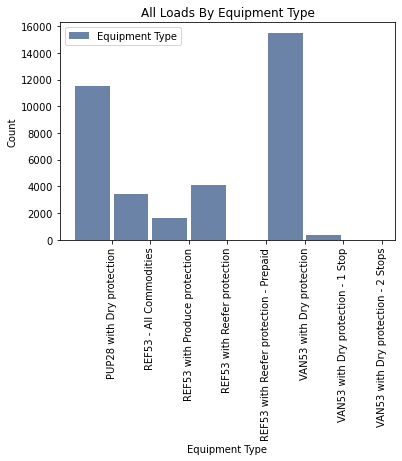

<Figure size 576x432 with 0 Axes>

In [21]:
hist = thinkstats2.Hist(late_load['equip_type_desc'], label='Equipment Type')
thinkplot.Hist(hist)
plt.xticks(rotation=90)
thinkplot.Config(title='All Loads By Equipment Type', xlabel='Equipment Type', ylabel='Count')
thinkplot.Show(root='equip_hist', bbox_inches = 'tight')

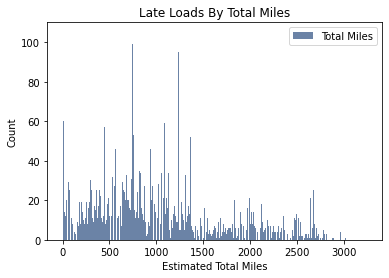

<Figure size 576x432 with 0 Axes>

In [22]:
hist = thinkstats2.Hist(late_load['est_tot_mi_qty'], label='Total Miles')
thinkplot.Hist(hist)
thinkplot.Config(title='Late Loads By Total Miles', xlabel='Estimated Total Miles', ylabel='Count', ylim=[0, 110])
thinkplot.Show(root='tot_miles', bbox_inches = 'tight')

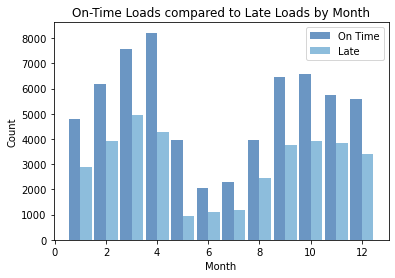

<Figure size 576x432 with 0 Axes>

In [23]:
on_time_load = load_df[load_df.Late_Load == 0]
late_load = load_df[load_df.Late_Load == 1]

on_time_hist = thinkstats2.Hist(on_time_load['carr_dlvr_due_dt'].dt.month, label='On Time')
late_hist = thinkstats2.Hist(late_load['carr_dlvr_due_dt'].dt.month, label='Late')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(on_time_hist, align='right', width=width)
thinkplot.Hist(late_hist, align='left', width=width)
thinkplot.Show(title='On-Time Loads compared to Late Loads by Month', xlabel='Month', ylabel='Count')

#### Initial analysis from the graphs

Looking at the late loads by destination seems to show three 'groups' of destinations that are impacted by late loads.  Group 1 would be those destinations that experienced less than 100 or so late loads, then 100-500 late loads, then greater than 500 late loads.  There is one stand out in the group, 6909-CP.  The CP indicates that it's a centerpoint which is a facility that brings freight in and very quickly consolidates it and moves it back out and on its way.  Looking at how centerpoints operate may be something interesting here.

The next graph indicates that 53 foot trailers hauling dry freight have the most lates.  This isn't a suprise as most of our freight is handled by 53 foot trailers and is dry freight.  This information would be important at the end of the model's analysis when leadership is evaluating possible direction to take.  There may be more return on investment to work on these types of late loads as they are most numerous.

A similar finding can be seen when looking into the number of late loads by total mileage.  The majority of late loads occur on the lower side of the mileage, so leadership may want to focus on those loads first to maximise their return on investment.

The final graph seems to show a larger disparity between on-time and late loads at the begining of the year.  Which is a little surprising to me as I would have expected this to occur during the 'peak' period leading up to the major U.S. holidays at the end of the year.  My first thought here is leadership focusing on on-time delivery during this peak time and then relaxing when we make it through that part of the year allowing lates to creep back up at the begining of the year?


## Milestone 2
### 01/31/2022

- Drop any features that are not useful for your model building and explain why they are not useful.
- Perform any data extraction/selection steps.
- Transform features if necessary.
- Engineer new useful features.
- Deal with missing data (do not just drop rows or columns without justifying this).
- Create dummy variables if necessary.
- Explain your process at each step. You can use any methods/tools you think are most appropriate. Do what makes the most sense for your data/problem. This will vary greatly among different projects. Be careful to avoid data snooping in these steps.

#### Drop any features that are not useful for your model building and explain why they are not useful.

In [24]:
load_df.shape

(99999, 141)

In [25]:
# lets take a look at all the columns and evaluate each of them.
pd.set_option('display.max_columns', None)
load_df.head()

,load_id,orign_loc_cd,orign_loc_id,orign_loc_type_cd,orign_loc_type_desc,orign_zone_cd,orign_loc_nm,orign_city_nm,orign_st_prov_cd,orign_postal_cd,orign_cntry_cd,dest_loc_cd,dest_loc_id,dest_loc_type_cd,dest_loc_type_desc,dest_zone_cd,dest_loc_nm,dest_city_nm,dest_st_prov_cd,dest_postal_cd,dest_cntry_cd,non_live_pckup_ind,non_live_dlvr_ind,svc_rate_cd,svc_rate_desc,trnsp_mode_cd,trnsp_mode_desc,equip_type_cd,equip_type_desc,spot_rate_ind,src_create_user_id,src_create_ts,src_last_chng_user_id,src_last_chng_ts,max_shpmnt_qty,load_stop_qty,optimizer_batch_id,scac_cd,op_cmpny_cd,op_load_status_id,op_load_status_cd,op_load_status_short_desc,op_load_status_desc,carrier_nm,carr_type_id,carr_type_cd,carr_type_desc,eff_rate_dt,lnhul_chrg_amt,fuel_surch_amt,addtnl_chrg_amt,tot_shpmnt_qty,tot_order_case_qty,tot_ord_pallet_qty,on_hld_shpmnt_qty,init_load_optim_ts,act_load_beg_ts,actl_load_orign_dep_ts,actl_load_final_dest_arvl_ts,act_load_cmpl_ts,est_met_ovrd_ind,est_tot_lad_len_qty,est_max_lad_len_qty,est_load_beg_ts,est_load_cmpl_ts,est_load_cmpl_hr_qty,est_tot_mi_qty,est_tot_dir_mi_qty,est_out_of_rte_mi_qty,est_load_mi_qty,est_unloaded_mi_qty,est_interload_mi_qty,est_repositioning_mi_qty,est_rtn_to_orign_mi_qty,est_tot_drvg_hr_qty,est_on_duty_hr_qty,est_off_duty_hr_qty,est_loadg_hr_qty,est_unloading_hr_qty,est_max_wait_hr_qty,est_wait_hr_qty,est_tot_wt_qty,est_max_wt_qty,est_tot_cube_qty,est_max_cube_qty,tot_optm_case_qty,est_max_case_qty,tot_optm_pallet_qty,est_max_pallet_qty,est_gross_carrier_chrg_amt,est_net_carrier_chrg_amt,load_cre_mthd_id,load_cre_mthd_cd,load_cre_mthd_desc,load_supended_status_id,load_supended_status_nm,load_supended_status_desc,pland_prmry_stop_qty,carrier_trnsp_mode_id,carrier_trnsp_mode_cd,carrier_trnsp_mode_desc,rate_shop_rsn_id,vouch_cre_excpt_ind,last_load_cost_calc_ts,last_load_tndr_ts,team_drvr_ind,protn_lvl_cd,protn_lvl_desc,mdse_seg_desc,commodity_id,commodity_desc,carr_pckup_due_dt,carr_dlvr_due_dt,cnsld_class_id,fin_load_status_id,fin_load_status_cd,fin_load_status_short_desc,fin_load_status_desc,shpmnt_plang_status_id,shpmnt_plang_status_cd,shpmnt_plang_status_desc,tndr_req_id,tendering_status_id,tendering_status_cd,tendering_status_desc,valid_rate_ind,frght_pymt_type_id,frght_pymt_type_cd,frght_pymt_type_desc,frght_bill_rspbl_party_cd,frght_bill_rspbl_party_nm,load_last_event_cd,load_last_event_desc,load_last_event_sys_gen_ind,src_rcv_ts,load_userid,load_ts,upd_ts,upd_userid,Late_Load,delivery_days_dif
0,10001386,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,H. P. HOOD FOODS,WINCHESTER,VA,22602,US,6047-DC,6047,DC,DC for PS,47937301-VNDR,"BEDFORD, PA GROC DC",BEDFORD,PA,15522,US,0,0,TLSR,Truck Load Mode with Single Service and Reefer...,TL,Full Truck Load,53RRE,REF53 with Reefer protection,0,VENTURE,51:07.0,vn507a6,45:04.0,1,2,1122,WALM,WMT-US,345,LL COMPLETED,Completed,Load Operational Statuses COMPLETED,Wal-Mart Private Fleet,4,FLEET,FLEET,4/28/2019,360.00,36.69,NaN,1,0,0,0,00:00.0,NaN,02:00.0,05:00.0,2019-04-28,0,0.0,0.0,01:00.0,05:00.0,2.07,93,93,0,93,0,0,0,0,2.07,2.07,0.0,0.0,0.0,0.00,0.00,36042.0,36042.0,744.0,36042.0,1280,0,0,0,396.69,396.69,1,OPT,Optimization,1,NOT SUSPEND,Not Suspended,2,3091,WALM_TL,WALM_TL Tariff,0,0,20:08.0,06:47.0,0,Reefer,Refrigerated / Frozen,GROCERY,120.0,"120-Dairy, Cheese, Dough,Deli Salads, Eggs, Ch...",2019-04-28,2019-04-28,98923182,1215,LLHFVCHRPND,Voucher Pending,Load Financial Voucher Pending,4,LOCKED,Locked,2605.0,50,ATP_CANCELED,User Cancelation,1,1,COLLECT,Collect,WM,Walmart,D1,D1-Completed Unloading at Delivery Location-No...,0.0,49:42.0,svcscdl,12:05.0,55:07.0,svcscdl,0,0.0
1,10001617,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,H. P. HOOD FOODS,WINCHESTER,VA,22602,US,6095-DC,6095,DC,DC for PS,47937301-VNDR,"OPELIKA, AL GROC DC",OPELIKA,AL,36801,US,0,0,TLSR,Truck Load Mode with Single Service and Reefer...,TL,Full Truck Load,53RRE,REF53 with Reefer protection,0,eerober,13:00.0,vn507a6,30:24.0,2,2,1163,STVV,WMT-US,345,LL COMPLETED,Comp

I plan on dropping the columns below based on the fact that they are basically text descriptions of other columns and not useful for building a model.  I've put a reason on each of these.

- orign_loc_id <-- description for orign_loc_cd
- orign_loc_type_desc <-- description for origin_loc_type_cd
- orign_zone_desc <-- description for origin_zone_cd
- orign_loc_nm <-- this is the name for the origin location
- dest_loc_type_desc <-- description for dest_loc_cd
- dest_zone_desc <-- description for dest_zone_cd
- dest_loc_nm <-- name for dest_loc_cd
- dest_cntry_cd <-- it's always US
- svc_rate_desc <-- description for the column svc_rate_cd
- trnsp_mode_desc <-- description for column trnsp_mode_cd
- equip_type_desc <-- description for column equip_type_desc
- op_load_status_cd <-- status of load, we might want to reduce down to completed loads
- op_load_status_short_desc <-- description for op_load_status_cd
- op_load_status_desc <-- description for op_load_status_cd
- carr_type_desc <-- carr_type_cd
- carrier_nm <-- review this, but this should just be a description for SCAC_code
- load_cre_mthd_desc <-- description of the column load_cre_mthd_cd
- load_supended_status_nm <-- description of the column load_supended_status_id
- load_supended_status_desc <-- description of the column load_supended_status_id
- carrier_trnsp_mode_desc <-- description for column carrier_trnsp_mode_cd
- rate_shop_rsn_cd <-- description for rate_shop_rsn_id
- rate_shop_rsn_desc <-- description for rate_shop_rsn_id
- last_vouch_cre_excpt_cd <-- description for last_vouch_cre_excpt_id
- last_vouch_cre_excpt_desc <-- description for last_vouch_cre_excpt_id
- protn_lvl_desc <-- description for column protn_lvl_cd
- mdse_seg_desc <-- description for column mdse_seg_nbr
- commodity_desc <-- description for commodity_id
- fin_load_status_desc and fin_load_status_short_desc and fin_load_status_cd <-- description for column fin_load_status_id
- shpmnt_plang_status_cd <-- description for column shpmnt_plang_status_cd
- shpmnt_plang_status_desc <-- description for column shpmnt_plang_status_cd
- tendering_status_cd <-- description for column tendering_status_id
- tendering_status_desc <-- description for column tendering_status_id
- frght_pymt_type_cd  <-- description for column frght_pymt_type_id
- frght_pymt_type_desc  <-- description for column frght_pymt_type_id
- frght_bill_rspbl_party_nm  <-- is either null or Walmart.  if we change it all to Walmart, then it doesn't do anything for the model, so we should drop it.
- load_last_event_desc <-- description for load_last_event_cd
- manl_load_late_event_desc <-- description for manl_load_late_event_cd
- upd_userid <-- their is only one value in this column
- load_userid <-- there is only one value in this column
- frght_bill_rspbl_party_cd <-- there is only one value in this column



In [26]:
load_df.shape

(99999, 141)

In [27]:
load_df.drop(['orign_loc_id','orign_loc_type_desc','orign_loc_nm','dest_loc_type_desc','dest_loc_nm','dest_cntry_cd',
              'svc_rate_desc','trnsp_mode_desc','equip_type_desc','op_load_status_cd','op_load_status_short_desc',
              'op_load_status_desc','carr_type_desc','carrier_nm','load_cre_mthd_desc','load_supended_status_nm',
              'load_supended_status_desc','carrier_trnsp_mode_desc','protn_lvl_desc','mdse_seg_desc',
              'commodity_desc','fin_load_status_desc','fin_load_status_short_desc','fin_load_status_cd','cnsld_class_id',
              'shpmnt_plang_status_cd','shpmnt_plang_status_desc','tendering_status_cd','tendering_status_desc',
              'frght_pymt_type_cd','frght_pymt_type_desc','frght_bill_rspbl_party_nm','load_last_event_desc',
              'load_userid','upd_userid'], axis=1, inplace=True)



I also need to drop loads that haven't been completed as of when the data was pulled.  It would be impossible to identify if they were late.

In [28]:
load_df.shape

(99999, 106)

In [29]:
load_df = load_df.dropna(subset=['act_load_cmpl_ts'])

I also now need to drop columns relating to 'future' information about the load.  i.e. information that would not be available to the model at the time of its running.

In [30]:
load_df.shape

(54385, 106)

In [31]:
load_df.drop(['act_load_cmpl_ts'], axis=1, inplace=True)
load_df.drop(['actl_load_final_dest_arvl_ts'], axis=1, inplace=True)

In [32]:
my_list = load_df.columns.values.tolist()
my_list

['load_id',
 'orign_loc_cd',
 'orign_loc_type_cd',
 'orign_zone_cd',
 'orign_city_nm',
 'orign_st_prov_cd',
 'orign_postal_cd',
 'orign_cntry_cd',
 'dest_loc_cd',
 'dest_loc_id',
 'dest_loc_type_cd',
 'dest_zone_cd',
 'dest_city_nm',
 'dest_st_prov_cd',
 'dest_postal_cd',
 'non_live_pckup_ind',
 'non_live_dlvr_ind',
 'svc_rate_cd',
 'trnsp_mode_cd',
 'equip_type_cd',
 'spot_rate_ind',
 'src_create_user_id',
 'src_create_ts',
 'src_last_chng_user_id',
 'src_last_chng_ts',
 'max_shpmnt_qty',
 'load_stop_qty',
 'optimizer_batch_id',
 'scac_cd',
 'op_cmpny_cd',
 'op_load_status_id',
 'carr_type_id',
 'carr_type_cd',
 'eff_rate_dt',
 'lnhul_chrg_amt',
 'fuel_surch_amt',
 'addtnl_chrg_amt',
 'tot_shpmnt_qty',
 'tot_order_case_qty',
 'tot_ord_pallet_qty',
 'on_hld_shpmnt_qty',
 'init_load_optim_ts',
 'act_load_beg_ts',
 'actl_load_orign_dep_ts',
 'est_met_ovrd_ind',
 'est_tot_lad_len_qty',
 'est_max_lad_len_qty',
 'est_load_beg_ts',
 'est_load_cmpl_ts',
 'est_load_cmpl_hr_qty',
 'est_tot_mi_q

In [33]:
load_df.shape

(54385, 104)

### come back and drop location information maybe

#### Perform any data extraction/selection steps.

I believe my data already contains several columns that are essentially 'extracted data'.  What I think I mean here is that the origin_loc_type_cd is a unique identifier for a load's origin location (a distribution center, vendor location, store, etc).  If this column didn't exist, I would use the address columns (street, city, state, zip) to uniquely identify a location such as a distribution center or store or vendor location.

I mentioned about the columns that pertain to a location's address(street, city, state, zip).  I considered combining those
columns into a singular column, but realized that column would end up being just a description for the origin_loc_type_cd and 
would essentially be repeated data.

#### Transform features if necessary.

I transformed some of the data earlier in order to create a column to indicate if the load was late.
- load_df.orign_loc_id = load_df.orign_loc_id.astype(str)
- load_df.dest_loc_id = load_df.dest_loc_id.astype(str)
- load_df.est_tot_mi_qty = load_df.est_tot_mi_qty.astype(int)
I removed timestamps from these columns:
- load_df.act_load_cmpl_ts = pd.to_datetime(load_df['act_load_cmpl_ts']).dt.date
- load_df.carr_pckup_due_dt = pd.to_datetime(load_df['carr_pckup_due_dt']).dt.date

In [34]:
#lets look at all the datatypes
pd.set_option('display.max_rows', None)
load_df.dtypes

load_id                                 int64
orign_loc_cd                           object
orign_loc_type_cd                      object
orign_zone_cd                          object
orign_city_nm                          object
orign_st_prov_cd                       object
orign_postal_cd                        object
orign_cntry_cd                         object
dest_loc_cd                            object
dest_loc_id                            object
dest_loc_type_cd                       object
dest_zone_cd                           object
dest_city_nm                           object
dest_st_prov_cd                        object
dest_postal_cd                          int64
non_live_pckup_ind                      int64
non_live_dlvr_ind                       int64
svc_rate_cd                            object
trnsp_mode_cd                          object
equip_type_cd                          object
spot_rate_ind                           int64
src_create_user_id                

Most of the columns above that end with _cd such as origin_loc_cd is a numeric number to identify a unique origin location, I'm ok leaving them objects as their numbers should be 'ranked'.
Columns such as lnhul_chrg_amt (line haul charge amount) are monetary and can be ranked.

#### Engineer new useful features.

I did an engineer a column earlier in the process to create the column 'late_load'.  This is a column that indicates if a load was delivered late to its destination.  I included the cell below commented out so it could be found above easier.

In [35]:
#comparison_column = np.where(load_df['act_load_cmpl_ts'] > load_df['carr_dlvr_due_dt'] + pd.DateOffset(1), 1, 0)
#load_df['Late_Load'] = comparison_column
#load_df[['load_id','act_load_cmpl_ts', 'carr_dlvr_due_dt', 'Late_Load']]

#### Deal with missing data (do not just drop rows or columns without justifying this).

In [36]:
# lets see which columns have missing data.

load_df.isna().any()

load_id                        False
orign_loc_cd                   False
orign_loc_type_cd              False
orign_zone_cd                  False
orign_city_nm                  False
orign_st_prov_cd               False
orign_postal_cd                False
orign_cntry_cd                 False
dest_loc_cd                    False
dest_loc_id                    False
dest_loc_type_cd               False
dest_zone_cd                   False
dest_city_nm                   False
dest_st_prov_cd                False
dest_postal_cd                 False
non_live_pckup_ind             False
non_live_dlvr_ind              False
svc_rate_cd                    False
trnsp_mode_cd                  False
equip_type_cd                  False
spot_rate_ind                  False
src_create_user_id             False
src_create_ts                  False
src_last_chng_user_id          False
src_last_chng_ts               False
max_shpmnt_qty                 False
load_stop_qty                  False
o

Here are the columns in my dataset that have missing data.  Will review each one to decide what to do with them.
- op_cmpny_cd
- lnhul_chrg_amt
- fuel_surch_amt
- addtnl_chrg_amt
- act_load_beg_ts
- actl_load_orign_dep_ts
- commodity_id
- frght_bill_rspbl_party_cd

In [37]:
print('op_cmpny_cd: ' + str(load_df.dtypes['op_cmpny_cd']))
print('lnhul_chrg_amt: '+ str(load_df.dtypes['lnhul_chrg_amt']))
print('fuel_surch_amt: '+ str(load_df.dtypes['fuel_surch_amt']))
print('addtnl_chrg_amt: '+ str(load_df.dtypes['addtnl_chrg_amt']))
print('act_load_beg_ts: '+ str(load_df.dtypes['act_load_beg_ts']))
print('actl_load_orign_dep_ts: '+ str(load_df.dtypes['actl_load_orign_dep_ts']))
print('commodity_id: '+ str(load_df.dtypes['commodity_id']))
print('frght_bill_rspbl_party_cd: '+ str(load_df.dtypes['frght_bill_rspbl_party_cd']))

op_cmpny_cd: object
lnhul_chrg_amt: float64
fuel_surch_amt: float64
addtnl_chrg_amt: float64
act_load_beg_ts: object
actl_load_orign_dep_ts: object
commodity_id: float64
frght_bill_rspbl_party_cd: object


In [38]:
# there are only 147 null entries for this first column.  The rest of the data is 'WMT-US'
# after filling this entire column with 'WMT-US', not sure it's really worth keeping.
print(load_df['op_cmpny_cd'].isna().sum())
load_df['op_cmpny_cd'] = load_df['op_cmpny_cd'].fillna('WMT-US')
print(load_df['op_cmpny_cd'].isna().sum())

147
0


In [39]:
# replace the NAN values in the line haul charge amount column with the mean charge

print(load_df['lnhul_chrg_amt'].isna().sum())
load_df['lnhul_chrg_amt'].fillna(value=load_df['lnhul_chrg_amt'].mean(), inplace=True)
print(load_df['lnhul_chrg_amt'].isna().sum())

15604
0


In [40]:
# replace the NAN values in the fuel surcharge amount column with the mean charge

print(load_df['fuel_surch_amt'].isna().sum())
load_df['fuel_surch_amt'].fillna(value=load_df['fuel_surch_amt'].mean(), inplace=True)
print(load_df['fuel_surch_amt'].isna().sum())

12309
0


In [41]:
# replace the NAN values in the additional charge amount column with the mean charge

print(load_df['addtnl_chrg_amt'].isna().sum())
load_df['addtnl_chrg_amt'].fillna(value=load_df['addtnl_chrg_amt'].mean(), inplace=True)
print(load_df['addtnl_chrg_amt'].isna().sum())

27280
0


In [42]:
# I didn't remove these columns earlier even though they represent information that would only be avaialbe to the model
# after the load was created and run.  But I can imagine running this model several times during the course of a time period and
# relaying it's output to the operations groups to help prevent these loads from being late if possible.  Same message with the
# column below.
# replace any NAN values in the actual load begin timestamp column with the same value that 
# exists in the actual load origin depart time stamp.

print(load_df['act_load_beg_ts'].isna().sum())
load_df['act_load_beg_ts'].fillna(value=load_df['actl_load_orign_dep_ts'], inplace=True)
print(load_df['act_load_beg_ts'].isna().sum())


4191
0


In [43]:
# replace any NAN values in the actual load origin depart timestamp column with the same value that 
# exists in the actual load begin time stamp.

print(load_df['actl_load_orign_dep_ts'].isna().sum())
load_df['actl_load_orign_dep_ts'].fillna(value=load_df['act_load_beg_ts'], inplace=True)
print(load_df['actl_load_orign_dep_ts'].isna().sum())


1
0


In [44]:
# lets look at the unique values that are in this column.
# each one of the values below corresponds to a specific type of commodity being shipped.
# there are three protection levels:  Ambient, chilled/wet, and Refrigerated / Frozen
# we're going to try and use the mode for NAN values, but going to take the mode from each of these protection levels.
# this way, we're not picking a commodity_id that doesn't go along with a specific protection level

print(load_df['commodity_id'].unique())


[120.  nan 125. 123. 103. 110. 132. 105. 107. 112. 109. 106. 108. 111.
 128. 116. 102. 136. 101. 115. 139. 138. 142. 141. 121. 114. 104. 113.
 119. 124.]


In [45]:
# lets get the mode for each protection level code

print(load_df.groupby('protn_lvl_cd').apply(lambda x: x['commodity_id'].value_counts().idxmax()))


protn_lvl_cd
Dry        128.0
Produce    110.0
Reefer     120.0
dtype: float64


In [46]:
# apply the mode for each protection level to the NAN values

print(load_df['commodity_id'].isna().sum())
load_df['commodity_id'].fillna(load_df.groupby(['protn_lvl_cd'])['commodity_id']
                               .transform(lambda x: x.mode()[0]), inplace = True)
print(load_df['commodity_id'].isna().sum())                           

10324
0


In [47]:
print(load_df['commodity_id'].isna().sum())

0


In [48]:
# lets look at the freight bill responsible party code column

print(load_df['frght_bill_rspbl_party_cd'].unique())
print(load_df['frght_bill_rspbl_party_cd'].isna().sum())

# there are only 91 rows with a NULL, going to fill with 'WM'
load_df['frght_bill_rspbl_party_cd'] = load_df['frght_bill_rspbl_party_cd'].fillna('WM')
print(load_df['frght_bill_rspbl_party_cd'].isna().sum())

['WM' nan]
2
0


#### Create dummy variables if necessary.

In [49]:
###### I've commented this out because I'm goign to work on the columns a little more below and once that is done, I'll
# create my dummy columns #####

# get a list of the object columns in the dataframe and use that list to create a dataframe with dummy columns
#object_column_list = list(load_df.select_dtypes(include=['object']).columns)
#load_df_dummies = pd.get_dummies(load_df, columns=object_column_list)

In [50]:
#load_df_dummies.head()

## Milestone 3
### 02/15/2022

In Milestone 3, you will begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.

In [51]:
# based on feedback, let's take a look through our dataset and see if there are any columns that we don't need.
# since the origin_loc_cd is a unique identifer for a location, I think I can drop the other address information as 
# its 'contained' in this origin loc_cd

load_df.head()

,load_id,orign_loc_cd,orign_loc_type_cd,orign_zone_cd,orign_city_nm,orign_st_prov_cd,orign_postal_cd,orign_cntry_cd,dest_loc_cd,dest_loc_id,dest_loc_type_cd,dest_zone_cd,dest_city_nm,dest_st_prov_cd,dest_postal_cd,non_live_pckup_ind,non_live_dlvr_ind,svc_rate_cd,trnsp_mode_cd,equip_type_cd,spot_rate_ind,src_create_user_id,src_create_ts,src_last_chng_user_id,src_last_chng_ts,max_shpmnt_qty,load_stop_qty,optimizer_batch_id,scac_cd,op_cmpny_cd,op_load_status_id,carr_type_id,carr_type_cd,eff_rate_dt,lnhul_chrg_amt,fuel_surch_amt,addtnl_chrg_amt,tot_shpmnt_qty,tot_order_case_qty,tot_ord_pallet_qty,on_hld_shpmnt_qty,init_load_optim_ts,act_load_beg_ts,actl_load_orign_dep_ts,est_met_ovrd_ind,est_tot_lad_len_qty,est_max_lad_len_qty,est_load_beg_ts,est_load_cmpl_ts,est_load_cmpl_hr_qty,est_tot_mi_qty,est_tot_dir_mi_qty,est_out_of_rte_mi_qty,est_load_mi_qty,est_unloaded_mi_qty,est_interload_mi_qty,est_repositioning_mi_qty,est_rtn_to_orign_mi_qty,est_tot_drvg_hr_qty,est_on_duty_hr_qty,est_off_duty_hr_qty,est_loadg_hr_qty,est_unloading_hr_qty,est_max_wait_hr_qty,est_wait_hr_qty,est_tot_wt_qty,est_max_wt_qty,est_tot_cube_qty,est_max_cube_qty,tot_optm_case_qty,est_max_case_qty,tot_optm_pallet_qty,est_max_pallet_qty,est_gross_carrier_chrg_amt,est_net_carrier_chrg_amt,load_cre_mthd_id,load_cre_mthd_cd,load_supended_status_id,pland_prmry_stop_qty,carrier_trnsp_mode_id,carrier_trnsp_mode_cd,rate_shop_rsn_id,vouch_cre_excpt_ind,last_load_cost_calc_ts,last_load_tndr_ts,team_drvr_ind,protn_lvl_cd,commodity_id,carr_pckup_due_dt,carr_dlvr_due_dt,fin_load_status_id,shpmnt_plang_status_id,tndr_req_id,tendering_status_id,valid_rate_ind,frght_pymt_type_id,frght_bill_rspbl_party_cd,load_last_event_cd,load_last_event_sys_gen_ind,src_rcv_ts,load_ts,upd_ts,Late_Load,delivery_days_dif
0,10001386,47937301-VNDR,VNDR,47937301-VNDR,WINCHESTER,VA,22602,US,6047-DC,6047,DC,47937301-VNDR,BEDFORD,PA,15522,0,0,TLSR,TL,53RRE,0,VENTURE,51:07.0,vn507a6,45:04.0,1,2,1122,WALM,WMT-US,345,4,FLEET,4/28/2019,360.00,36.69,696.476687,1,0,0,0,00:00.0,02:00.0,02:00.0,0,0.0,0.0,01:00.0,05:00.0,2.07,93,93,0,93,0,0,0,0,2.07,2.07,0.0,0.0,0.0,0.00,0.00,36042.0,36042.0,744.0,36042.0,1280,0,0,0,396.69,396.69,1,OPT,1,2,3091,WALM_TL,0,0,20:08.0,06:47.0,0,Reefer,120.0,2019-04-28,2019-04-28,1215,4,2605.0,50,1,1,WM,D1,0.0,49:42.0,12:05.0,55:07.0,0,0.0
1,10001617,47937301-VNDR,VNDR,47937301-VNDR,WINCHESTER,VA,22602,US,6095-DC,6095,DC,47937301-VNDR,OPELIKA,AL,36801,0,0,TLSR,TL,53RRE,0,eerober,13:00.0,vn507a6,30:24.0,2,2,1163,STVV,WMT-US,345,3,COMMON,4/29/2019,1554.31,200.48,696.476687,2,0,0,0,16:00.0,47:00.0,15:00.0,0,0.0,0.0,58:00.0,00:00.0,29.03,697,697,0,697,0,0,0,0,15.48,19.03,10.0,0.0,0.0,3.55,3.55,41816.0,41816.0,1005.0,41816.0,1560,0,0,0,1754.79,1754.79,1,OPT,1,2,3005,STVV_TL,0,0,32:30.0,16:05.0,0,Reefer,120.0,2019-04-29,2019-04-29,1230,4,3016.0,20,1,1,WM,D1,0.0,49:42.0,12:04.0,55:07.0,1,2.0
2,10001644,47937301-VNDR,VNDR,47937301-VNDR,WINCHESTER,VA,22602,US,6047-DC,6047,DC,47937301-VNDR,BEDFORD,PA,15522,0,0,TLSR,TL,53RRE,0,VENTURE,20:31.0,vn507a6,45:18.0,3,2,1182,WALM,WMT-US,345,4,FLEET,4/30/2019,360.00,28.27,696.476687,3,0,0,0,09:00.0,00:00.0,30:00.0,0,0.0,0.0,01:00.0,53:00.0,1.87,84,84,0,84,0,0,0,0,1.87,1.87,0.0,0.0,0.0,0.00,0.00,36593.0,36593.0,850.0,36593.0,1325,0,0,0,388.27,388.27,1,OPT,1,2,3091,WALM_TL,0,0,23:41.0,52:41.0,0,Reefer,120.0,2019-04-30,2019-04-30,1215,4,3405.0,20,1,1,WM,AFSYSGEN,0.0,49:42.0,12:06.0,55:07.0,0,0.0
3,10001762,47937301-VNDR,VNDR,47937301-VNDR,WINCHESTER,VA,22602,US,6064-DC,6064,DC,47937301-VNDR,CLEBURNE,TX,76033,0,0,TLSR,TL,53RRE,0,VENTURE,20:32.0,vn507a6,30:50.0,2,2,1182,RBTW,WMT-US,345,3,COMMON,4/26/2019,2059.84,358.63,696.476687,2,0,0,0,20:00.0,20:00.0,20:00.0,0,0.0,0.0,01:00.0,10:00.0,49.15,1312,1312,0,1312,0,0,0,0,29.15,29.15,20.0,0.0,0.0,0.00,0.00,40431.0,40431.0,1017.0,40431.0,1726,0,0,0,2418.47,2418.47,1,OPT,1,2,3015,RBTW_TL,0,0,42:21.0,09:39.0,0,Reefer,120.0,2019-04-30,2019-04-30,1230,4,3230.0,20,1,1,WM,D1,0.0,49:42.0,12:06.0,55:07.0,1,2.0
4,1000244

In [52]:
#  We have way too many dummy columns being created, need to review what is there and then determine what to do.

object_column_list = list(load_df.select_dtypes(include=['object']).columns)
object_column_list

['orign_loc_cd',
 'orign_loc_type_cd',
 'orign_zone_cd',
 'orign_city_nm',
 'orign_st_prov_cd',
 'orign_postal_cd',
 'orign_cntry_cd',
 'dest_loc_cd',
 'dest_loc_id',
 'dest_loc_type_cd',
 'dest_zone_cd',
 'dest_city_nm',
 'dest_st_prov_cd',
 'svc_rate_cd',
 'trnsp_mode_cd',
 'equip_type_cd',
 'src_create_user_id',
 'src_create_ts',
 'src_last_chng_user_id',
 'src_last_chng_ts',
 'scac_cd',
 'op_cmpny_cd',
 'carr_type_cd',
 'eff_rate_dt',
 'init_load_optim_ts',
 'act_load_beg_ts',
 'actl_load_orign_dep_ts',
 'est_load_beg_ts',
 'est_load_cmpl_ts',
 'load_cre_mthd_cd',
 'carrier_trnsp_mode_cd',
 'last_load_cost_calc_ts',
 'last_load_tndr_ts',
 'protn_lvl_cd',
 'frght_bill_rspbl_party_cd',
 'load_last_event_cd',
 'src_rcv_ts',
 'load_ts',
 'upd_ts']

In [53]:
print(len(load_df['src_last_chng_ts'].unique()))
print(len(load_df['eff_rate_dt'].unique()))

3600
736


In [54]:
# I've decided to drop these columns as they are essentially contained within the origin and location code columns.
# If I have time, I'm going to come back and convert the timestamps to parts of the day.
# The timestamps for estimated load begin timestamp and similar might be valuable to be converted into groups of time
# related to specific shifts at a DC, though this would mean I would have to assume that every DC and location
# uses the same shift time periods which is probably not the case.

load_df.drop(['orign_zone_cd', 'orign_city_nm','orign_st_prov_cd','orign_postal_cd','orign_cntry_cd',
              'dest_city_nm','dest_st_prov_cd','dest_postal_cd','act_load_beg_ts','actl_load_orign_dep_ts',
              'carrier_trnsp_mode_cd', 'est_load_beg_ts', 'est_load_cmpl_ts','init_load_optim_ts',
             'est_load_beg_ts','est_load_cmpl_ts','last_load_cost_calc_ts','last_load_tndr_ts',
             'src_rcv_ts','load_ts','upd_ts','src_last_chng_ts','src_create_ts'], axis=1, inplace=True)

In [55]:
# looking at how many unique dates are included in these date objects.

print(len(load_df['eff_rate_dt'].unique()))
print(len(load_df['carr_pckup_due_dt'].unique()))
print(len(load_df['carr_dlvr_due_dt'].unique()))

736
737
737


In [56]:
# in order to help reduce the number of dummy columns, I'm going to convert these date fields over to months

load_df['eff_rate_dt'] = pd.to_datetime(load_df['eff_rate_dt']).dt.month
load_df['carr_pckup_due_dt'] = pd.to_datetime(load_df['carr_pckup_due_dt']).dt.month
load_df['carr_dlvr_due_dt'] = pd.to_datetime(load_df['carr_dlvr_due_dt']).dt.month


In [57]:
load_df.shape

(54385, 83)

In [59]:
# get a list of the object columns in the dataframe and use that list to create a dataframe with dummy columns

object_column_list = list(load_df.select_dtypes(include=['object']).columns)
load_df_dummies = pd.get_dummies(load_df, columns=object_column_list)

In [60]:
# lets look at the list itself.  I used this earlier when I was having problems with timestamps and realized that they
# were being included in the list and dummy columns were being created.

object_column_list

['orign_loc_cd',
 'dest_loc_cd',
 'dest_loc_id',
 'dest_zone_cd',
 'trnsp_mode_cd',
 'equip_type_cd',
 'src_create_user_id',
 'scac_cd',
 'load_cre_mthd_cd',
 'protn_lvl_cd']

In [61]:
# taking a look at some of the columns

len(load_df['dest_loc_id'].unique())

190

In [62]:
# let see how big the dataframe is now with the dummy columns.
# before I did additional data clean-up, this dataframe had ballooned to over 23k columns, which made modeling pretty
# much impossible

load_df_dummies.shape

(54385, 5556)

In [63]:
load_df.head()

,load_id,orign_loc_cd,dest_loc_cd,dest_loc_id,dest_zone_cd,non_live_pckup_ind,non_live_dlvr_ind,trnsp_mode_cd,equip_type_cd,spot_rate_ind,src_create_user_id,max_shpmnt_qty,load_stop_qty,optimizer_batch_id,scac_cd,op_load_status_id,carr_type_id,eff_rate_dt,lnhul_chrg_amt,fuel_surch_amt,addtnl_chrg_amt,tot_shpmnt_qty,tot_order_case_qty,tot_ord_pallet_qty,on_hld_shpmnt_qty,est_met_ovrd_ind,est_tot_lad_len_qty,est_max_lad_len_qty,est_load_cmpl_hr_qty,est_tot_mi_qty,est_tot_dir_mi_qty,est_out_of_rte_mi_qty,est_load_mi_qty,est_unloaded_mi_qty,est_interload_mi_qty,est_repositioning_mi_qty,est_rtn_to_orign_mi_qty,est_tot_drvg_hr_qty,est_on_duty_hr_qty,est_off_duty_hr_qty,est_loadg_hr_qty,est_unloading_hr_qty,est_max_wait_hr_qty,est_wait_hr_qty,est_tot_wt_qty,est_max_wt_qty,est_tot_cube_qty,est_max_cube_qty,tot_optm_case_qty,est_max_case_qty,tot_optm_pallet_qty,est_max_pallet_qty,est_gross_carrier_chrg_amt,est_net_carrier_chrg_amt,load_cre_mthd_id,load_cre_mthd_cd,load_supended_status_id,pland_prmry_stop_qty,carrier_trnsp_mode_id,rate_shop_rsn_id,vouch_cre_excpt_ind,team_drvr_ind,protn_lvl_cd,commodity_id,carr_pckup_due_dt,carr_dlvr_due_dt,fin_load_status_id,shpmnt_plang_status_id,tndr_req_id,tendering_status_id,valid_rate_ind,frght_pymt_type_id,load_last_event_sys_gen_ind,Late_Load,delivery_days_dif
0,10001386,47937301-VNDR,6047-DC,6047,47937301-VNDR,0,0,TL,53RRE,0,VENTURE,1,2,1122,WALM,345,4,4,360.00,36.69,696.476687,1,0,0,0,0,0.0,0.0,2.07,93,93,0,93,0,0,0,0,2.07,2.07,0.0,0.0,0.0,0.00,0.00,36042.0,36042.0,744.0,36042.0,1280,0,0,0,396.69,396.69,1,OPT,1,2,3091,0,0,0,Reefer,120.0,4,4,1215,4,2605.0,50,1,1,0.0,0,0.0
1,10001617,47937301-VNDR,6095-DC,6095,47937301-VNDR,0,0,TL,53RRE,0,eerober,2,2,1163,STVV,345,3,4,1554.31,200.48,696.476687,2,0,0,0,0,0.0,0.0,29.03,697,697,0,697,0,0,0,0,15.48,19.03,10.0,0.0,0.0,3.55,3.55,41816.0,41816.0,1005.0,41816.0,1560,0,0,0,1754.79,1754.79,1,OPT,1,2,3005,0,0,0,Reefer,120.0,4,4,1230,4,3016.0,20,1,1,0.0,1,2.0
2,10001644,47937301-VNDR,6047-DC,6047,47937301-VNDR,0,0,TL,53RRE,0,VENTURE,3,2,1182,WALM,345,4,4,360.00,28.27,696.476687,3,0,0,0,0,0.0,0.0,1.87,84,84,0,84,0,0,0,0,1.87,1.87,0.0,0.0,0.0,0.00,0.00,36593.0,36593.0,850.0,36593.0,1325,0,0,0,388.27,388.27,1,OPT,1,2,3091,0,0,0,Reefer,120.0,4,4,1215,4,3405.0,20,1,1,0.0,0,0.0
3,10001762,47937301-VNDR,6064-DC,6064,47937301-VNDR,0,0,TL,53RRE,0,VENTURE,2,2,1182,RBTW,345,3,4,2059.84,358.63,696.476687,2,0,0,0,0,0.0,0.0,49.15,1312,1312,0,1312,0,0,0,0,29.15,29.15,20.0,0.0,0.0,0.00,0.00,40431.0,40431.0,1017.0,40431.0,1726,0,0,0,2418.47,2418.47,1,OPT,1,2,3015,0,0,0,Reefer,120.0,4,4,1230,4,3230.0,20,1,1,0.0,1,2.0
4,10002440,47937301-VNDR,7016-DC,7016,47937301-VNDR,0,0,TL,53RRE,0,VENTURE,1,2,1225,WALM,345,4,5,360.00,37.02,696.476687,1,0,0,0,0,0.0,0.0,2.08,94,94,0,94,0,0,0,0,2.08,2.08,0.0,0.0,0.0,0.00,0.00,35842.0,35842.0,744.0,35842.0,1280,0,0,0,397.02,397.02,1,OPT,1,2,3091,0,0,0,Reefer,120.0,5,5,1215,4,3846.0,20,1,1,1.0,0,0.0


In [65]:
# Split the data into a training and test set, where the “Loan_Status” column is the target.

#X
X = load_df_dummies.drop(['Late_Load','delivery_days_dif'], axis=1)
#Y
y = load_df_dummies['Late_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [77]:
# going to start small to ensure that I've got a working model

standardizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

In [55]:
# create a search space for KNN varying from 1-10
# set up the grid search  with 5 fold cv to figure the best K value
#grab the knn__n_neighbors parameter from the classifier to get the K value

search_space = [{'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

classifier = GridSearchCV(pipe, search_space, cv=2, verbose=0).fit(X_train, y_train)
K = classifier.best_estimator_.get_params()["knn__n_neighbors"]
print('The best K is : {}'.format(K))

y_predict = classifier.predict(X_test)

score = accuracy_score(y_test,y_predict)
print("The model's accuracy is: {:.2f}".format(score))

The best K is : 7
The model's accuracy is: 0.84


In [78]:
# create a pipeline and set up some search spaces for different model types

pipe = Pipeline([('standardizer', standardizer),('classifier', LogisticRegression())])

search_space = [
    {'classifier': [LogisticRegression(solver='liblinear')],
     'classifier__penalty': ['l1','l2'],
     'classifier__C': np.logspace(0,4,10)},
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': [10,100,1000],
     'classifier__max_features': [1,2,3,4,5,6,7,8,9,10]}]

In [57]:
# use gridsearch to search for the best model from those passed to it.

gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0)
best_model = gridsearch.fit(X_train, y_train)

In [58]:
# now that we have the best model, lets make a prediciton then look at it's scores

y_predict = best_model.predict(X_test)

score = accuracy_score(y_test,y_predict)
print("The model's accuracy is: {:.2f}".format(score))

The model's accuracy is: 0.86


In [62]:
best_model.best_estimator_.get_params()["classifier"]

RandomForestClassifier(max_features=8, n_estimators=1000)

In [59]:
cf_matrix = confusion_matrix(y_test, y_predict)
print(cf_matrix)

[[2841  752]
 [ 755 6529]]


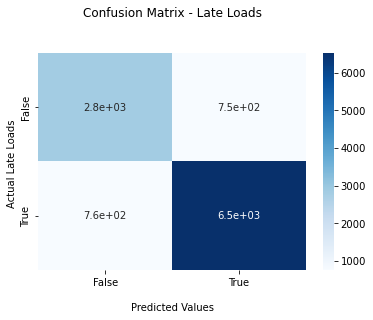

In [60]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix - Late Loads\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Late Loads ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [61]:
print(classification_report(y_test,y_predict))
      

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      3593
           1       0.90      0.90      0.90      7284

    accuracy                           0.86     10877
   macro avg       0.84      0.84      0.84     10877
weighted avg       0.86      0.86      0.86     10877



#### Summary
1. The best model ended up being the RandomForest with 8 max features and 1000 estimators.
    1. Looks like the more estimators that you use with RandomForest, the better the accuracy will be, although it is at a diminishing rate of return.  I would like to research what that rate of return would be to help gauge how long the model will run vs. how much better the accuracy becomes.
    1. The model produced a result of 86% weighted average on accuracy, recall and f1-score.


#### Lessons learned
1. Data wrangling is a real thing!  I know this has been discussed, but it probably one of the most important aspects of developing a model, if not the most important step in the process.
    1. Having business knowledge of the subject you're modeling is a huge advantage.  During this part of the project, I was able to evaluate the data columns on my own as I understood what they meant from a business perspective.
    1. So far, the data wrangling aspect of the project has taken the majority of the time and needs to be planned into future projects.
    1. Look at your dataframes before running your model, ensure that they are the size you expected!
    1. Some of the columns that were removed from the dataset, may be used in the future depending on how they can be grouped together to engineer new columns that may bring additional value to the model.
1. Running these models takes quite a bit of computes and time.
    1. Plan enough time for your models to execute.
    1. It would probaby be a good idea to call the pipeline multiple times with specific models, hyperparamters, etc during the begining to ensure that you have good data that will actually execute.
1. Overall, I was really happy with how the model is performing and I look forward to applying it to some additional data to see how well it performs.   

#### Principal Component Analysis
- I added this to the bottom because I want to compare with the existing efforts above

In [58]:
# going to drop a few additional columns before running dummies, then perform PCA and see how that impacts the model.
   
load_df.drop(['orign_loc_type_cd', 'dest_loc_type_cd','svc_rate_cd','src_last_chng_user_id','op_cmpny_cd',
              'carr_type_cd','frght_bill_rspbl_party_cd','load_last_event_cd'], axis=1, inplace=True)

In [64]:
from sklearn.preprocessing import scale
from sklearn import decomposition

In [66]:
# scale the feature data

X = scale(X)

In [67]:
# lets take a look at the shape
X.shape

(54385, 5554)

In [68]:
# create the PCA object with components with a variance of .95
# fit the data

pca = decomposition.PCA(n_components = 0.95)
pca.fit(X)

PCA(n_components=0.95)

In [69]:
scores = pca.transform(X)

In [70]:
# look at the shape after transforming
# the dimensions was reduced, but still quite large.  I was hoping there would be fewer.

scores.shape

(54385, 4412)

In [71]:
# split the data, replace X with scores

X_train, X_test, y_train, y_test = train_test_split(scores, y, test_size=0.20)

In [72]:
# brought this down for ease in understanding (probably should create a few functions for these steps)

standardizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

In [73]:
search_space = [{'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

classifier = GridSearchCV(pipe, search_space, cv=2, verbose=0).fit(X_train, y_train)
K = classifier.best_estimator_.get_params()["knn__n_neighbors"]
print('The best K is : {}'.format(K))

y_predict = classifier.predict(X_test)

score = accuracy_score(y_test,y_predict)
print("The model's accuracy is: {:.2f}".format(score))

The best K is : 3
The model's accuracy is: 0.82


In [ ]:
# Interesting that the accuracy has dropped to 82% after dropping additional columns and running PCA with .95.
# Continueing to refine the model, I will review the dropped features and review which ones should be added back
# and determine if there are other features that could be dropped without impact to the model.